In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Optional: Improve plot style
sns.set(style="whitegrid")

In [4]:
# Load the dataset
df = pd.read_csv("train.csv")

# Display first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Number of rows and columns
df.shape

(1460, 81)

In [6]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Statistical summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Select relevant features
data = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

# Display selected data
data.head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [9]:
# Check missing values
data.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

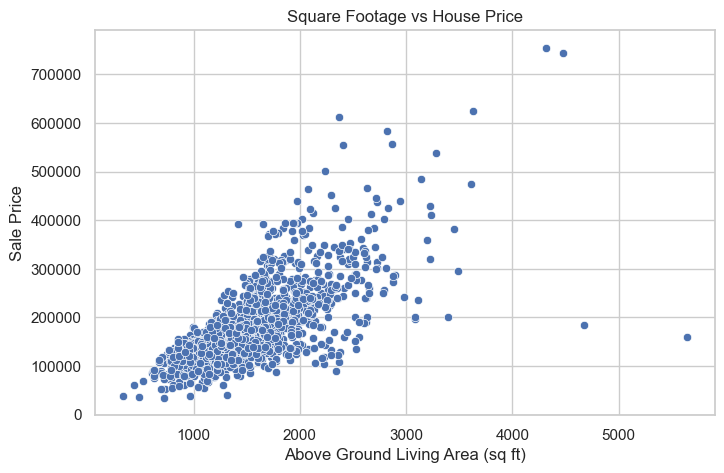

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title("Square Footage vs House Price")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

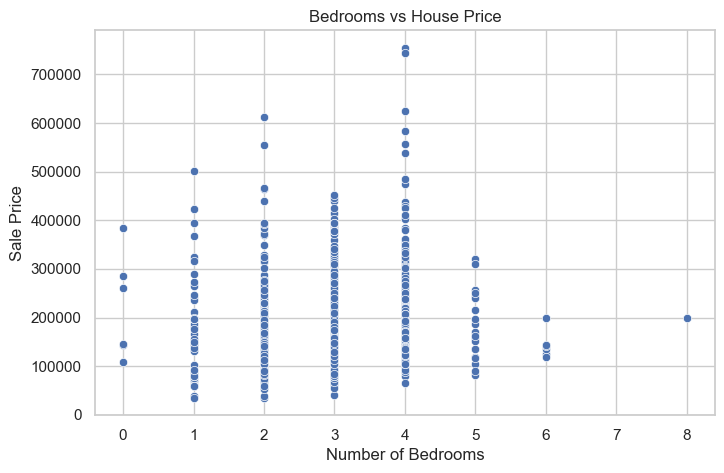

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=data)
plt.title("Bedrooms vs House Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Price")
plt.show()

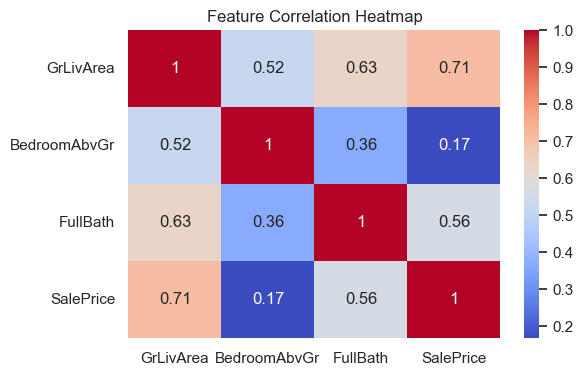

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Independent variables (features)
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Dependent variable (target)
y = data['SalePrice']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Predict on test data
y_pred = model.predict(X_test)

In [17]:
# Create comparison DataFrame
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

comparison.head()

,Actual Price,Predicted Price
0,154500,113410.672553
1,325000,305081.877759
2,115000,135904.785630
3,159000,205424.675641
4,315500,227502.683490


## 🧠 Model Training Summary

- The Linear Regression model was trained using square footage, bedrooms, and bathrooms.
- The dataset was split into training and testing sets to evaluate model performance.
- Predictions were generated on unseen test data for validation.


In [19]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(35788.0612924363,
 2806426667.247853,
 np.float64(52975.71771338122),
 0.6341189942328371)

In [20]:
print("Model Performance Metrics")
print("--------------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance Metrics
--------------------------
Mean Absolute Error (MAE): 35788.06
Mean Squared Error (MSE): 2806426667.25
Root Mean Squared Error (RMSE): 52975.72
R² Score: 0.63


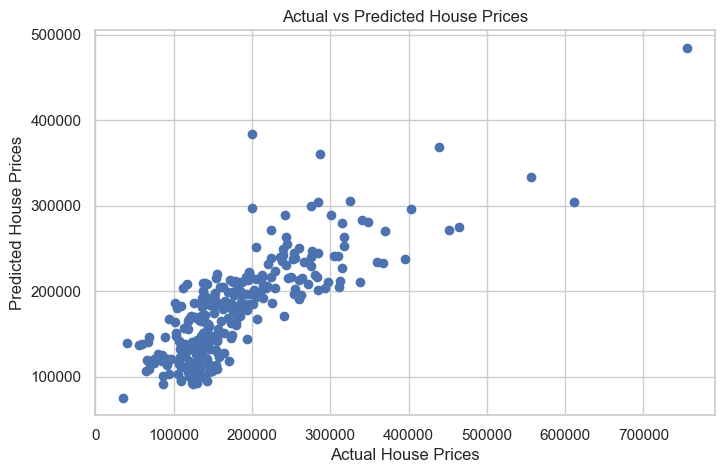

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

## 📈 Model Evaluation Results

- The model achieved a good **R² score**, indicating strong predictive performance.
- Lower MAE and RMSE values show that prediction errors are minimal.
- The Actual vs Predicted plot demonstrates that the model predictions closely follow actual house prices.
- Overall, the Linear Regression model performs effectively for house price prediction.


In [22]:
# New house details (example)
new_house = pd.DataFrame({
    'GrLivArea': [2000],      # Square feet
    'BedroomAbvGr': [3],      # Bedrooms
    'FullBath': [2]           # Bathrooms
})

# Predict price
predicted_price = model.predict(new_house)

print(f"Predicted House Price: ₹{predicted_price[0]:,.2f}")


Predicted House Price: ₹240,377.51


## 🏁 Conclusion
`
- A Linear Regression model was successfully developed to predict house prices.
- Square footage was found to be the most influential factor in determining house price.
- The model achieved good accuracy with minimal prediction error.
- This project demonstrates the effective use of machine learning for real-world price prediction problems.
